In [1]:
# Importing necessary packages
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

In [2]:
# Importing necessary packages
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
# Load the dataframe
data = pd.read_csv('Preprocessed_data_1.csv')

# Create a copy of the dataframe
pre_df = data.copy()

# Handling missing values in the 'text' column
pre_df['text'] = pre_df['text'].fillna('')

# Drop rows with empty strings in the 'text' column
pre_df = pre_df[pre_df['text'] != '']

# Reset the index of the DataFrame
pre_df.reset_index(drop=True, inplace=True)

In [3]:
pre_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55876 entries, 0 to 55875
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       55876 non-null  int64 
 1   text             55876 non-null  object
 2   original_text    55876 non-null  object
 3   listed_emotions  55876 non-null  object
 4   emotion_count    55876 non-null  int64 
 5   labels           55876 non-null  object
 6   encoded_labels   55876 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 3.0+ MB


In [4]:
# Tokenization
tokenizer = Tokenizer()
texts = pre_df['text']
tokenizer.fit_on_texts(texts)  # 'texts' represents the text data
num_words = len(tokenizer.word_index) + 1  # Add 1 for the reserved 0 index
embedding_dim = 100
sequence_lengths = [len(tokens) for tokens in tokenizer.texts_to_sequences(texts)]
max_sequence_length = max(sequence_lengths)
num_classes = len(set(pre_df['labels']))

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [6]:
# Vectorization
vectorizer = TfidfVectorizer()
text_vectorized = vectorizer.fit_transform(pre_df['text'].values.astype('U'))
svd = TruncatedSVD(n_components=100)
text_vectorized_svd = svd.fit_transform(text_vectorized)
vectorized_df = pd.DataFrame(text_vectorized_svd)
pre_df_vectorized = pd.concat([pre_df, vectorized_df], axis=1)

In [7]:
# Split the data
X = text_vectorized_svd
y = pre_df['encoded_labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [8]:
# Reshape the input data
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [9]:
# One-hot encode the target variable
encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1)).toarray()
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1)).toarray()

In [10]:
# Define the model architecture
model = Sequential()
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2, input_shape=(1, X_train.shape[2])))
model.add(Dense(units=num_classes, activation='softmax'))

e:\Softwares\Programming Languages\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:

# Train the model
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded),
          callbacks=[early_stopping])

Epoch 1/10
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4460 - loss: 1.0520 - val_accuracy: 0.4914 - val_loss: 0.9713
Epoch 2/10
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4718 - loss: 0.9962 - val_accuracy: 0.4921 - val_loss: 0.9653
Epoch 3/10
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4776 - loss: 0.9903 - val_accuracy: 0.4978 - val_loss: 0.9661
Epoch 4/10
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4780 - loss: 0.9886 - val_accuracy: 0.5122 - val_loss: 0.9708
Epoch 5/10
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4815 - loss: 0.9828 - val_accuracy: 0.4993 - val_loss: 0.9649
Epoch 6/10
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4776 - loss: 0.9879 - val_accuracy: 0.4947 - val_loss: 0.9622
Epoch 7/10
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4860 - loss: 0.9828 - val_accuracy: 0.4961 - val_loss: 0.9630
Epoch 8/10
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4856 - loss: 0.9840 - 

In [13]:
y_pred = model.predict(X_test)  
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test_encoded, axis=1)

print(classification_report(y_test_labels, y_pred_labels))

699/699 ━━━━━━━━━━━━━━━━━━━━ 1s 691us/step
              precision    recall  f1-score   support

           0       0.52      0.25      0.33      6244
           1       0.40      0.20      0.27      6100
           2       0.51      0.84      0.64     10007

    accuracy                           0.50     22351
   macro avg       0.48      0.43      0.41     22351
weighted avg       0.48      0.50      0.45     22351



## Fine Tuning the model


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report
import numpy as np

# Define the model architecture with improvements
model = Sequential()

# Bidirectional LSTM with Dropout and Batch Normalization
model.add(Bidirectional(LSTM(units=128, dropout=0.3, recurrent_dropout=0.3, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(BatchNormalization())

# Second LSTM layer for feature extraction
model.add(Bidirectional(LSTM(units=64, dropout=0.3, recurrent_dropout=0.3)))
model.add(Dropout(0.5))

# Fully connected dense layer
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))

# Output layer with softmax activation
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for Early Stopping and Learning Rate Reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    X_train, y_train_encoded,
    epochs=40,
    batch_size=64,  # Larger batch size can stabilize training
    validation_data=(X_test, y_test_encoded),
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test_encoded, axis=1)

# Print classification report
print(classification_report(y_test_labels, y_pred_labels))


Epoch 1/40


e:\Softwares\Programming Languages\Python\Python312\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


524/524 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4506 - loss: 1.0328 - val_accuracy: 0.5101 - val_loss: 1.0068 - learning_rate: 0.0010
Epoch 2/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4926 - loss: 0.9892 - val_accuracy: 0.5082 - val_loss: 0.9594 - learning_rate: 0.0010
Epoch 3/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4875 - loss: 0.9925 - val_accuracy: 0.5132 - val_loss: 0.9588 - learning_rate: 0.0010
Epoch 4/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4953 - loss: 0.9827 - val_accuracy: 0.5197 - val_loss: 0.9569 - learning_rate: 0.0010
Epoch 5/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4988 - loss: 0.9816 - val_accuracy: 0.5139 - val_loss: 0.9588 - learning_rate: 0.0010
Epoch 6/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4990 - loss: 0.9829 - val_accuracy: 0.5083 - val_loss: 0.9576 - learning_rate: 0.0010
Epoch 7/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5006 - loss: 0.9825 - val_accurac

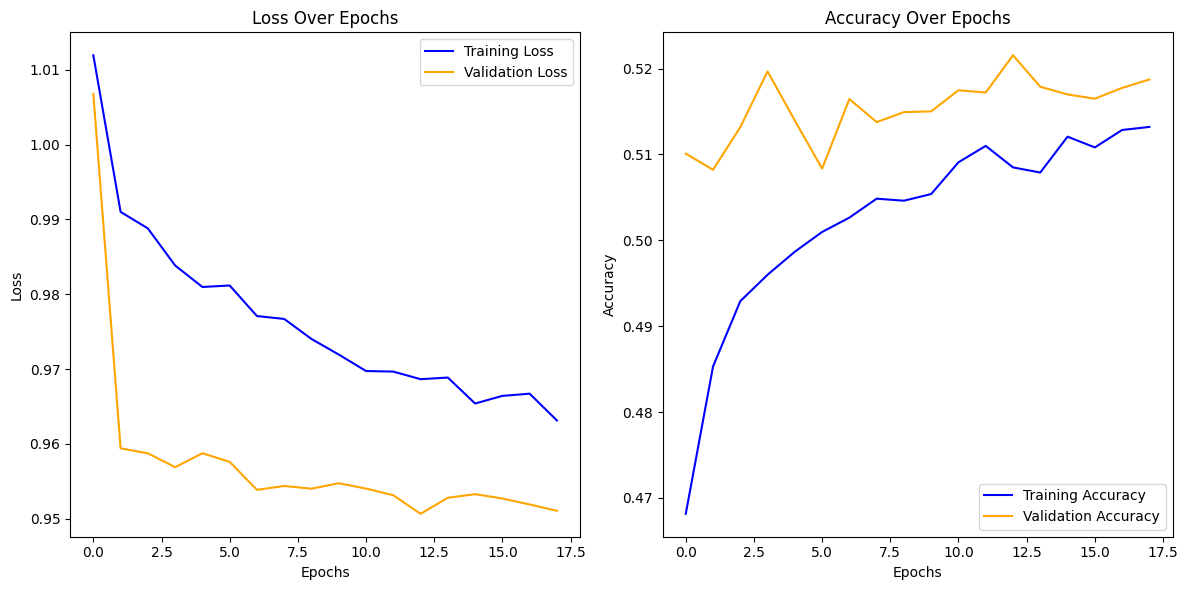

In [15]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report
import numpy as np

# Define the LSTM + GRU model
model = Sequential()

# First Bidirectional LSTM layer with Batch Normalization
model.add(Bidirectional(LSTM(units=128, dropout=0.3, recurrent_dropout=0.3, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(BatchNormalization())

# Second GRU layer
model.add(Bidirectional(GRU(units=64, dropout=0.3, recurrent_dropout=0.3, return_sequences=False)))
model.add(Dropout(0.5))

# Fully connected dense layer
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))

# Output layer with softmax activation
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for Early Stopping and Learning Rate Reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    X_train, y_train_encoded,
    epochs=30,
    batch_size=64,
    validation_data=(X_test, y_test_encoded),
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model
y_pred = np.argmax(model.predict(X_test), axis=1)
y_test_labels = np.argmax(y_test_encoded, axis=1)

# Classification report
print(classification_report(y_test_labels, y_pred))


e:\Softwares\Programming Languages\Python\Python312\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4463 - loss: 1.0341 - val_accuracy: 0.4820 - val_loss: 1.0242 - learning_rate: 0.0010
Epoch 2/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4874 - loss: 0.9944 - val_accuracy: 0.5162 - val_loss: 0.9658 - learning_rate: 0.0010
Epoch 3/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4893 - loss: 0.9925 - val_accuracy: 0.5124 - val_loss: 0.9613 - learning_rate: 0.0010
Epoch 4/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4951 - loss: 0.9833 - val_accuracy: 0.5146 - val_loss: 0.9585 - learning_rate: 0.0010
Epoch 5/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5024 - loss: 0.9794 - val_accuracy: 0.5114 - val_loss: 0.9631 - learning_rate: 0.0010
Epoch 6/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5036 - loss: 0.9818 - val_accuracy: 0.5113 - val_loss: 0.9600 - learning_rate: 0.0010
Epoch 7/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5010 - loss: 0.9818 - 

Epoch 1/40


e:\Softwares\Programming Languages\Python\Python312\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


524/524 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4465 - loss: 1.0463 - val_accuracy: 0.4825 - val_loss: 0.9736 - learning_rate: 0.0010
Epoch 2/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4758 - loss: 1.0005 - val_accuracy: 0.4951 - val_loss: 0.9647 - learning_rate: 0.0010
Epoch 3/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4782 - loss: 0.9886 - val_accuracy: 0.5094 - val_loss: 0.9631 - learning_rate: 0.0010
Epoch 4/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4874 - loss: 0.9865 - val_accuracy: 0.5100 - val_loss: 0.9603 - learning_rate: 0.0010
Epoch 5/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4807 - loss: 0.9873 - val_accuracy: 0.5001 - val_loss: 0.9586 - learning_rate: 0.0010
Epoch 6/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4887 - loss: 0.9890 - val_accuracy: 0.5057 - val_loss: 0.9597 - learning_rate: 0.0010
Epoch 7/40
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4897 - loss: 0.9844 - val_accurac

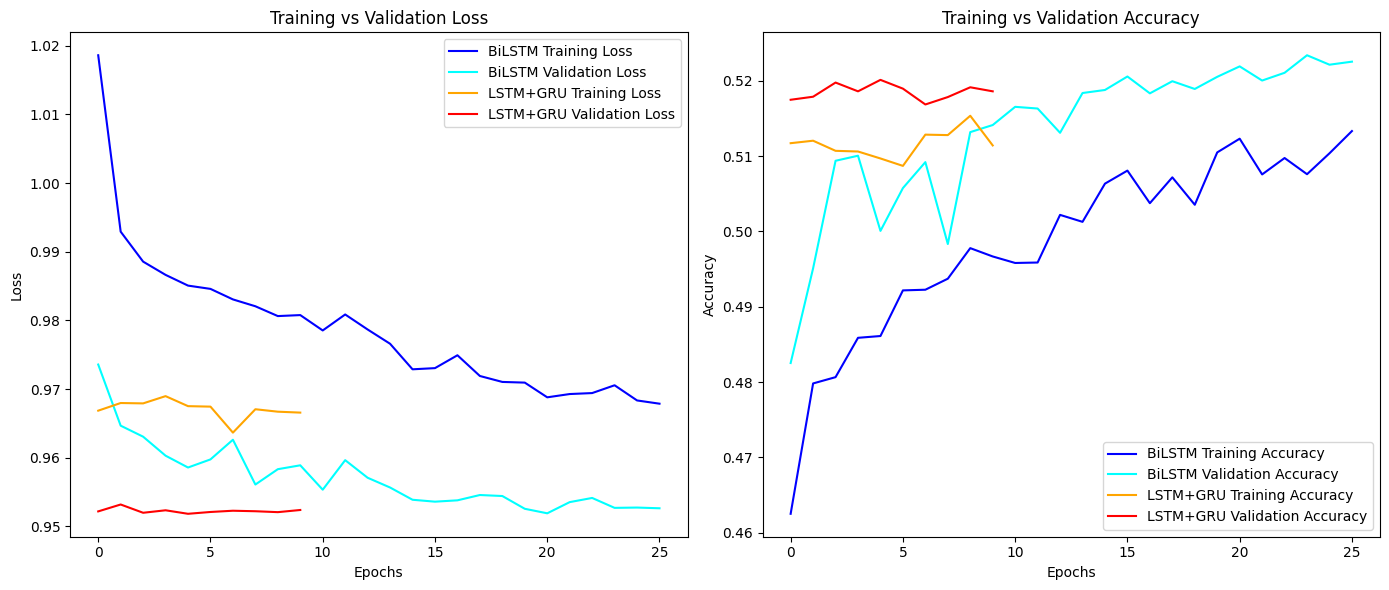

In [17]:
import matplotlib.pyplot as plt

# Define the Bidirectional LSTM model
bilstm_model = Sequential()
bilstm_model.add(Bidirectional(LSTM(units=128, dropout=0.3, recurrent_dropout=0.3, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
bilstm_model.add(Bidirectional(LSTM(units=64, dropout=0.3, recurrent_dropout=0.3)))
bilstm_model.add(Dropout(0.5))
bilstm_model.add(Dense(units=64, activation='relu'))
bilstm_model.add(Dropout(0.5))
bilstm_model.add(Dense(units=num_classes, activation='softmax'))

bilstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train Bidirectional LSTM model
history_bilstm = bilstm_model.fit(
    X_train, y_train_encoded,
    epochs=40,
    batch_size=64,
    validation_data=(X_test, y_test_encoded),
    callbacks=[early_stopping, reduce_lr]
)

# Train LSTM + GRU model (defined in the previous cell)
history_lstm_gru = model.fit(
    X_train, y_train_encoded,
    epochs=40,
    batch_size=64,
    validation_data=(X_test, y_test_encoded),
    callbacks=[early_stopping, reduce_lr]
)

# Plot comparison of loss and accuracy
plt.figure(figsize=(14, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history_bilstm.history['loss'], label='BiLSTM Training Loss', color='blue')
plt.plot(history_bilstm.history['val_loss'], label='BiLSTM Validation Loss', color='cyan')
plt.plot(history_lstm_gru.history['loss'], label='LSTM+GRU Training Loss', color='orange')
plt.plot(history_lstm_gru.history['val_loss'], label='LSTM+GRU Validation Loss', color='red')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_bilstm.history['accuracy'], label='BiLSTM Training Accuracy', color='blue')
plt.plot(history_bilstm.history['val_accuracy'], label='BiLSTM Validation Accuracy', color='cyan')
plt.plot(history_lstm_gru.history['accuracy'], label='LSTM+GRU Training Accuracy', color='orange')
plt.plot(history_lstm_gru.history['val_accuracy'], label='LSTM+GRU Validation Accuracy', color='red')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report
import numpy as np

# Define the LSTM + GRU model
model = Sequential()

# First Bidirectional LSTM layer with Batch Normalization
model.add(Bidirectional(LSTM(units=128, dropout=0.3, recurrent_dropout=0.3, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(BatchNormalization())

# Second GRU layer
model.add(Bidirectional(GRU(units=64, dropout=0.3, recurrent_dropout=0.3, return_sequences=False)))
model.add(Dropout(0.5))

# Fully connected dense layer
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))

# Output layer with softmax activation
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for Early Stopping and Learning Rate Reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    X_train, y_train_encoded,
    epochs=30,
    batch_size=64,
    validation_data=(X_test, y_test_encoded),
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model
y_pred = np.argmax(model.predict(X_test), axis=1)
y_test_labels = np.argmax(y_test_encoded, axis=1)

# Classification report
print(classification_report(y_test_labels, y_pred))


from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Updated max_length based on the training sequence length
max_length = 100  # Assuming the model was trained with 100-length sequences

# Define a function to preprocess and predict sentiment for a given model
def predict_sentiment(model, tokenizer, text, label_encoder, max_length):
    """
    Predicts the sentiment of the given text using the specified model.
    
    Parameters:
        model: Trained model (e.g., BiLSTM or LSTM+GRU)
        tokenizer: Tokenizer used during training
        text: Input text (string)
        label_encoder: Label encoder used for decoding class labels
        max_length: Maximum sequence length used during training
    
    Returns:
        Predicted sentiment label (string)
    """
    # Preprocess the text: Tokenize and pad
    text_sequence = tokenizer.texts_to_sequences([text])
    text_padded = pad_sequences(text_sequence, maxlen=max_length, padding='post', truncating='post')
    
    # Predict using the specified model
    prediction = model.predict(text_padded)
    
    # Decode the predicted label
    predicted_label_index = np.argmax(prediction, axis=1)[0]
    predicted_label = label_encoder.inverse_transform([predicted_label_index])[0]
    
    return predicted_label




Epoch 1/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4340 - loss: 1.0433 - val_accuracy: 0.4943 - val_loss: 1.0268 - learning_rate: 0.0010
Epoch 2/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4806 - loss: 0.9982 - val_accuracy: 0.5068 - val_loss: 0.9670 - learning_rate: 0.0010
Epoch 3/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4967 - loss: 0.9861 - val_accuracy: 0.5141 - val_loss: 0.9599 - learning_rate: 0.0010
Epoch 4/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4952 - loss: 0.9898 - val_accuracy: 0.5152 - val_loss: 0.9619 - learning_rate: 0.0010
Epoch 5/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4961 - loss: 0.9845 - val_accuracy: 0.5151 - val_loss: 0.9567 - learning_rate: 0.0010
Epoch 6/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4989 - loss: 0.9822 - val_accuracy: 0.5127 - val_loss: 0.9592 - learning_rate: 0.0010
Epoch 7/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4994 - loss: 0.9784 - 

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report
import numpy as np
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder on the training labels (before training the model)
label_encoder.fit(y_train)  # Use the raw labels, not the encoded ones

# Define the LSTM + GRU model
model = Sequential()

# First Bidirectional LSTM layer with Batch Normalization
model.add(Bidirectional(LSTM(units=128, dropout=0.3, recurrent_dropout=0.3, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(BatchNormalization())

# Second GRU layer
model.add(Bidirectional(GRU(units=64, dropout=0.3, recurrent_dropout=0.3, return_sequences=False)))
model.add(Dropout(0.5))

# Fully connected dense layer
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))

# Output layer with softmax activation
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for Early Stopping and Learning Rate Reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    X_train, y_train_encoded,
    epochs=30,
    batch_size=64,
    validation_data=(X_test, y_test_encoded),
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model
y_pred = np.argmax(model.predict(X_test), axis=1)
y_test_labels = np.argmax(y_test_encoded, axis=1)

# Classification report
print(classification_report(y_test_labels, y_pred))


from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Updated max_length based on the training sequence length
max_length = 100  # Assuming the model was trained with 100-length sequences

# Define a function to preprocess and predict sentiment for a given model
def predict_sentiment(model, tokenizer, text, label_encoder, max_length):
    """
    Predicts the sentiment of the given text using the specified model.
    
    Parameters:
        model: Trained model (e.g., BiLSTM or LSTM+GRU)
        tokenizer: Tokenizer used during training
        text: Input text (string)
        label_encoder: Label encoder used for decoding class labels
        max_length: Maximum sequence length used during training
    
    Returns:
        Predicted sentiment label (string)
    """
    # Preprocess the text: Tokenize and pad
    text_sequence = tokenizer.texts_to_sequences([text])
    text_padded = pad_sequences(text_sequence, maxlen=max_length, padding='post', truncating='post')
    
    # Reshape the input to match the expected shape for the model
    text_padded = np.reshape(text_padded, (text_padded.shape[0], 1, text_padded.shape[1]))  # Shape: (1, 1, 100)
    
    # Predict using the specified model
    prediction = model.predict(text_padded)
    
    # Decode the predicted label
    predicted_label_index = np.argmax(prediction, axis=1)[0]
    predicted_label = label_encoder.inverse_transform([predicted_label_index])[0]
    
    return predicted_label


Epoch 1/30


e:\Softwares\Programming Languages\Python\Python312\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


524/524 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4344 - loss: 1.0456 - val_accuracy: 0.4975 - val_loss: 1.0261 - learning_rate: 0.0010
Epoch 2/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4858 - loss: 0.9952 - val_accuracy: 0.5126 - val_loss: 0.9626 - learning_rate: 0.0010
Epoch 3/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4909 - loss: 0.9889 - val_accuracy: 0.5107 - val_loss: 0.9639 - learning_rate: 0.0010
Epoch 4/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4966 - loss: 0.9859 - val_accuracy: 0.5117 - val_loss: 0.9602 - learning_rate: 0.0010
Epoch 5/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4940 - loss: 0.9861 - val_accuracy: 0.5105 - val_loss: 0.9605 - learning_rate: 0.0010
Epoch 6/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4996 - loss: 0.9790 - val_accuracy: 0.5137 - val_loss: 0.9574 - learning_rate: 0.0010
Epoch 7/30
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4931 - loss: 0.9878 - val_accurac

In [20]:
model.save('sentiment_model_1.h5')

In [21]:
# Example
random_text = "The service was excellent and I am extremely happy with my experience!"

# Predict using BiLSTM model
#bilstm_sentiment = predict_sentiment(bilstm_model, tokenizer, random_text, label_encoder, max_length)
#print(f"BiLSTM Model Predicted Sentiment: {bilstm_sentiment}")

# Predict using LSTM+GRU model
lstm_gru_sentiment = predict_sentiment(model, tokenizer, random_text, label_encoder, max_length)
print(f"LSTM+GRU Model Predicted Sentiment: {lstm_gru_sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step
LSTM+GRU Model Predicted Sentiment: 2


In [22]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

In [23]:
def predict_sentiment(model, tokenizer, text, label_encoder, max_length):
    """
    Predicts the sentiment of the given text using the specified model.
    
    Parameters:
        model: Trained model (e.g., BiLSTM or LSTM+GRU)
        tokenizer: Tokenizer used during training
        text: Input text (string)
        label_encoder: Label encoder used for decoding class labels
        max_length: Maximum sequence length used during training
    
    Returns:
        Predicted sentiment label (string)
    """
    import numpy as np
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    
    # Preprocess the text: Tokenize and pad
    text_sequence = tokenizer.texts_to_sequences([text])
    text_padded = pad_sequences(text_sequence, maxlen=max_length, padding='post', truncating='post')
    
    # Reshape the padded input to add the third dimension (features = 1)
    text_reshaped = np.expand_dims(text_padded, axis=-1)  # Add 3rd dimension
    
    # Predict using the specified model
    prediction = model.predict(text_reshaped)
    
    # Decode the predicted label
    predicted_label_index = np.argmax(prediction, axis=1)[0]
    predicted_label = label_encoder.inverse_transform([predicted_label_index])[0]
    
    return predicted_label


699/699 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step


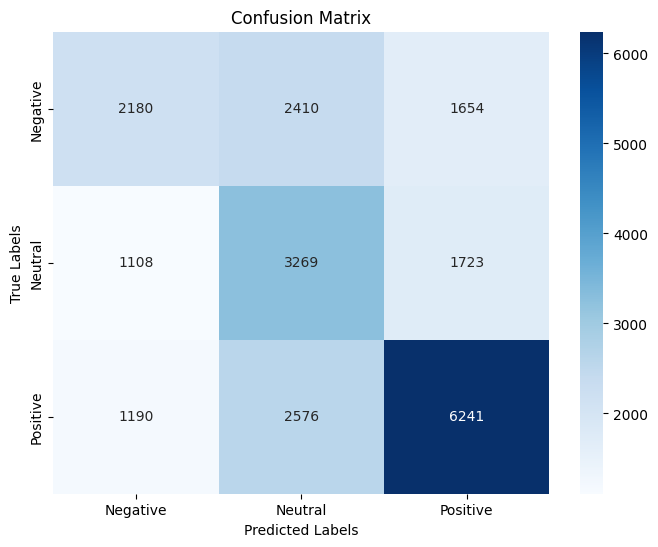

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get the predicted class labels from the model
y_pred = np.argmax(model.predict(X_test), axis=1)

# Get the true class labels
y_test_labels = np.argmax(y_test_encoded, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_test_labels, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [25]:
import streamlit as st

# Get user input for text
user_input = st.text_input("Enter text for sentiment analysis:")

# Perform sentiment analysis using the SVM model
if user_input:
    # Then use the trained SVM model to make predictions
    # predicted_label = model.predict([user_input])[0]
    lstm_gru_sentiment = predict_sentiment(model, tokenizer, random_text, label_encoder, max_length)
    print(f"LSTM+GRU Model Predicted Sentiment: {lstm_gru_sentiment}")

    # Display the sentiment prediction
    # st.write("Sentiment:", predicted_label)

#Defining a function to collect the user input and make predictions

def main():
    st.title('Sentiment Analysis with NLP Model')
    text_input = st.text_area('Enter text:', 'Type your text here...')
    if st.button('Analyze'):
        if text_input:
            result = model(text_input)
            sentiment = result[0]['label']
            confidence = result[0]['score']
            st.write(f'Sentiment: {sentiment} with confidence: {confidence:.2f}')

if __name__ == '__main__':
    main()

2024-12-13 13:08:28.437 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-13 13:08:28.437 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-13 13:08:28.437 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-13 13:08:28.439 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-13 13:08:28.439 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2024-12-13 13:08:28.441 WARNING streamlit.runtime.scriptrunner_utils.script_run_c